In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

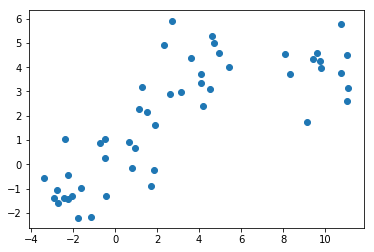

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [5]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x000001C7FECF52F0>)

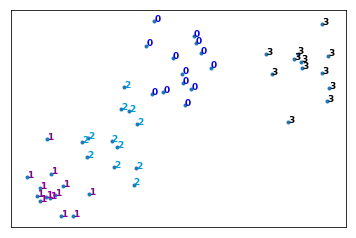

In [6]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])



plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)


[[0.         1.10330053 0.53476197 ... 0.58590244 0.91900741 0.69366547]
 [1.10330053 0.         0.61813606 ... 0.63492347 0.52830934 0.51632549]
 [0.53476197 0.61813606 0.         ... 0.09569997 0.40430172 0.16115466]
 ...
 [0.58590244 0.63492347 0.09569997 ... 0.         0.33409321 0.12537687]
 [0.91900741 0.52830934 0.40430172 ... 0.33409321 0.         0.2499503 ]
 [0.69366547 0.51632549 0.16115466 ... 0.12537687 0.2499503  0.        ]]


In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')

F:\Installed Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


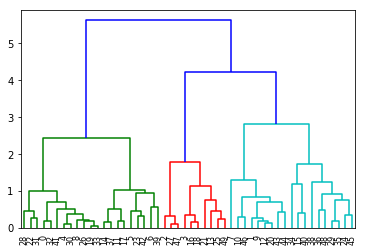

In [9]:
dendro = hierarchy.dendrogram(Z)

F:\Installed Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


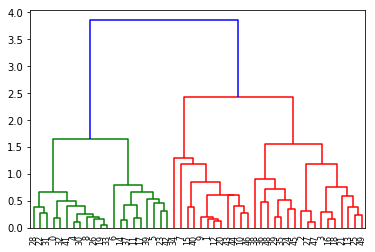

In [10]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)
